# Exercise 1

| Name | Surname | ID Number |
|------|---------|---------------------|
| Andrea | Turci | 2106724 |

### Import Zone

In [1]:
library(geosphere)

### 1\. Read the data and import in a data.frame or tibble structure


In [2]:
data1 <- read.csv("/home/sdruci/Statistics/hw1/Data_CitiBike/JC-201902-citibike-tripdata.csv", stringsAsFactors = TRUE)
data2 <- read.csv("/home/sdruci/Statistics/hw1/Data_CitiBike/JC-201903-citibike-tripdata.csv", stringsAsFactors = TRUE)
data3 <- read.csv("/home/sdruci/Statistics/hw1/Data_CitiBike/JC-201904-citibike-tripdata.csv", stringsAsFactors = TRUE)
data4 <- read.csv("/home/sdruci/Statistics/hw1/Data_CitiBike/JC-201905-citibike-tripdata.csv", stringsAsFactors = TRUE)
data5 <- read.csv("/home/sdruci/Statistics/hw1/Data_CitiBike/JC-201906-citibike-tripdata.csv", stringsAsFactors = TRUE)


### 2\. Merge the five data frames in an unique structure

In [3]:
merged_data <- rbind(data1, data2, data3, data4, data5)

data <- data.frame(merged_data)

### 3\. Check for missing data and remove it, if any

In [4]:
data_missing <- sum(is.na(data))

# Remove rows with any NA values
cleaned_data <- na.omit(data)
head(cleaned_data, 5)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<int>,<int>
1,142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1
2,223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2
3,106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1
4,370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1
5,315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1


### 4.1\. Compute the average and the median trip duration in minutes


In [5]:
trip_durat <- data$tripduration

average_trip_durat <- mean(trip_durat) /60
median_trip_durat <- median(trip_durat) /60

cat("Average trip duration is", average_trip_durat, "min", '\n')
cat("Median trip duration is", median_trip_durat, "min", '\n')

Average trip duration is 12.81071 min 
Median trip duration is 5.683333 min 


### 4.2\. Evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

In [6]:
max_trip_duration <- max(trip_durat) /60
min_trip_duration <- min(trip_durat) /60

cat("Minimum trip duration is", min_trip_duration, "min", '\n')
cat("Maximum trip duration is", max_trip_duration, "min", '\n')

Minimum trip duration is 1.016667 min 
Maximum trip duration is 28817 min 


Expecially the maximum value for the trip duration is not considerable as a reasonable value, since it is around 20 days. So, it must be considered as outliers

### 4.3\. Repeat the calculation of the average (and the median) trip duration by excluding trips longer than 3 hours. Next, evaluate the number of skimmed entries

In [7]:
mask <- trip_durat <= (3*3600)

no_outliers <- data[mask,]
no_out_tripdurat <- no_outliers$tripduration

mean_no_outliers <- mean(no_out_tripdurat) /60
median_no_outliers <- median(no_out_tripdurat) /60

skimmed <- length(trip_durat) - length(no_out_tripdurat)

cat("Excluding trips longer than 3 hours:")
cat("Average trip duration is", mean_no_outliers, "min", '\n')
cat("Median trip duration is", median_no_outliers, "min", '\n')
cat("The number of skimmed entries is", skimmed, '\n')

Excluding trips longer than 3 hours:Average trip duration is 9.223037 min 
Median trip duration is 5.666667 min 
The number of skimmed entries is 427 


### 4.4\. Plot the distribution of trip duration after the skimming of the previous point


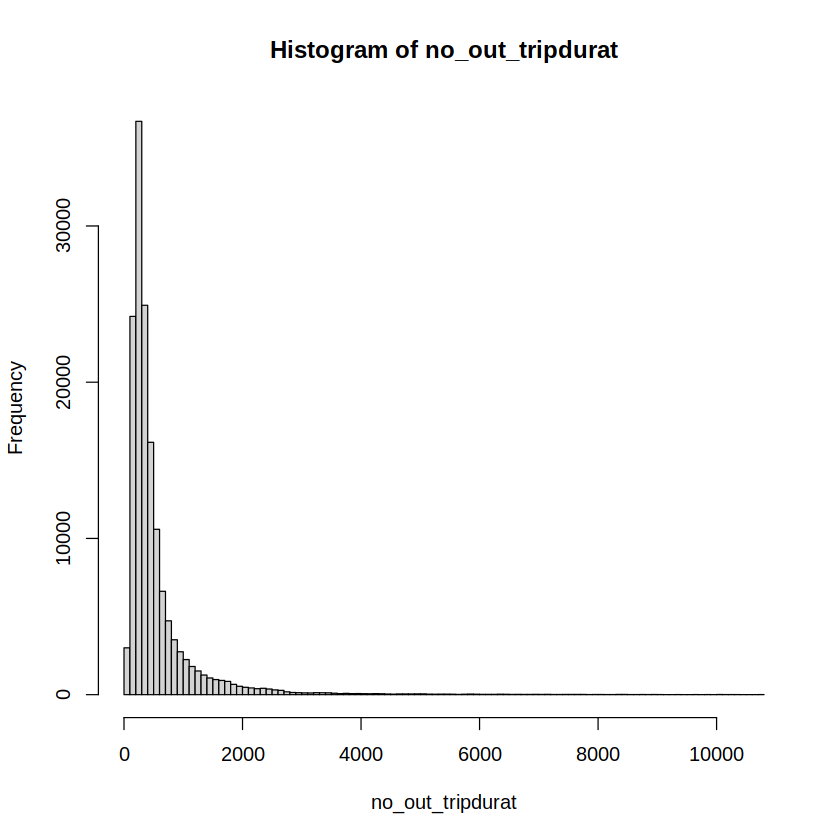

In [8]:
hist(no_out_tripdurat, breaks = 100)

### 5\. Plot the monthly average trip duration

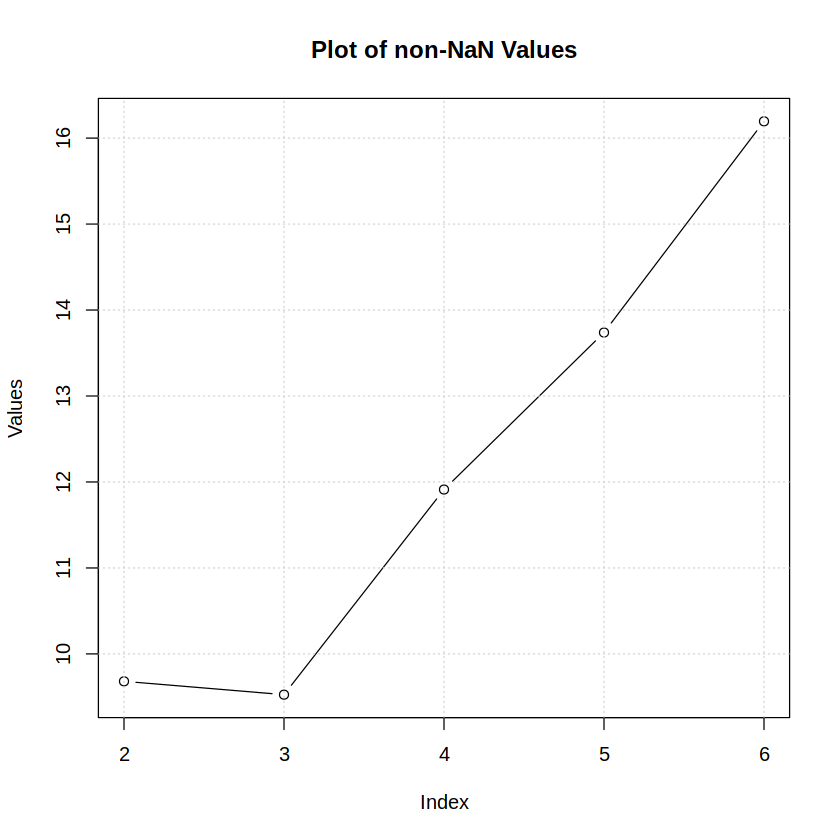

In [9]:
timestamp <- as.POSIXct(no_outliers$starttime, format = "%Y-%m-%d %H:%M:%S")

no_outliers$month <- as.integer(format(timestamp, "%m"))

month_averages <- c()

for (i in 1:12) {
    mask <- no_outliers$month == i
    selected_month <- data[mask,]
    average <- mean(selected_month$tripduration) /60
    
    month_averages <- c(month_averages, average)
}

non_nan_index <- !is.nan(month_averages)

non_nan_values <- month_averages[non_nan_index]
non_nan_indices <- which(non_nan_index)

plot(non_nan_indices, non_nan_values, type = "b", xlab = "Index", ylab = "Values", main = "Plot of non-NaN Values")
grid()

### 6.1\. Plot the number of rides per day


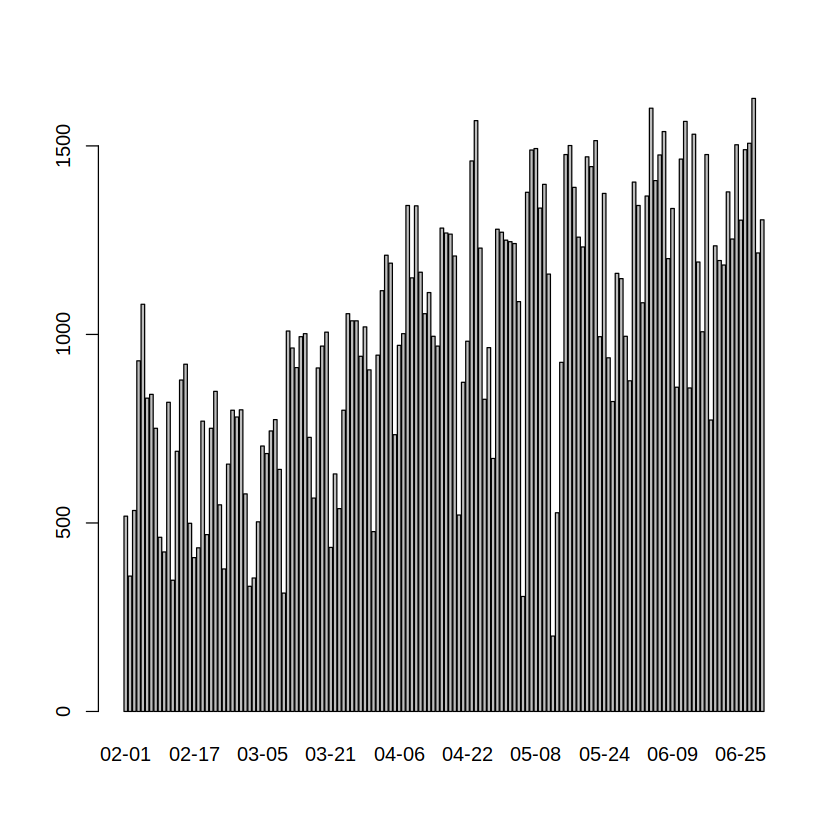

In [10]:
no_outliers$day <- format(timestamp, "%m-%d")

rides <- table(no_outliers$day)

plot_rides <- barplot(rides)

### 6.2\. Plot the hourly distribution on weekdays and on weekends

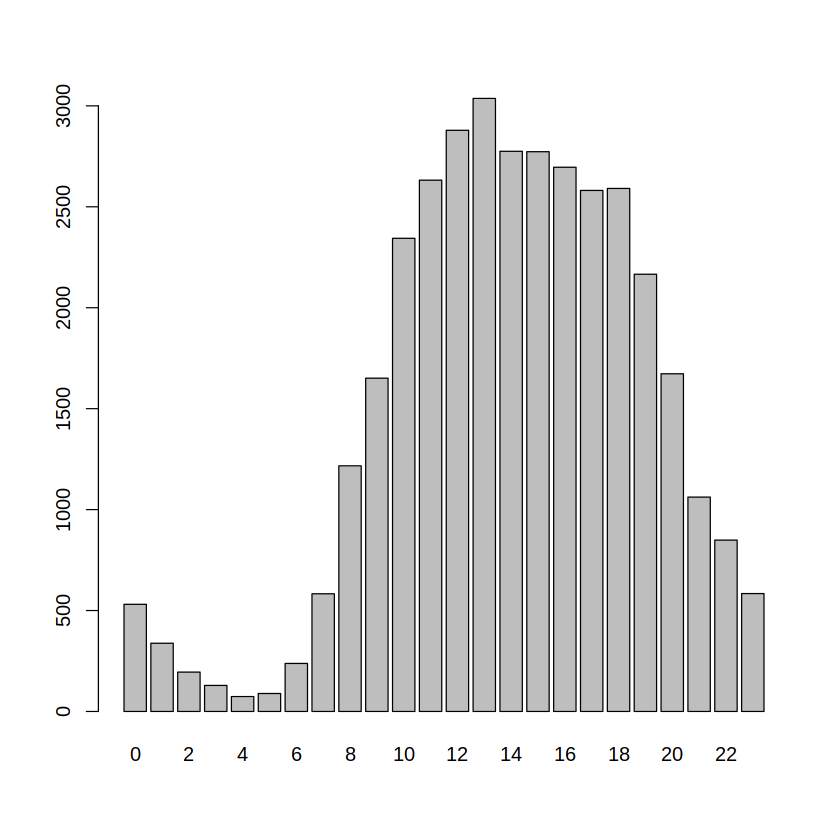

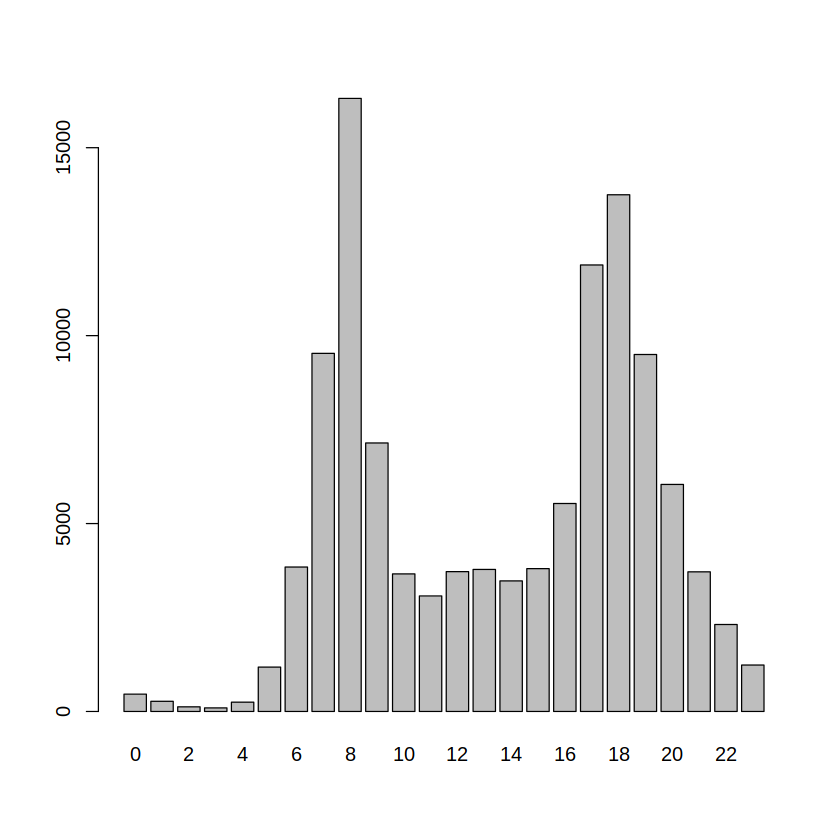

In [11]:
no_outliers$date <- as.Date(no_outliers$starttime)

day_of_week <- weekdays(no_outliers$date)

no_outliers$day_type <- ifelse(day_of_week %in% c("Saturday", "Sunday"), "weekend", "weekday")

no_outliers$hour <- as.integer(format(timestamp, "%H"))

weekends <- no_outliers[no_outliers$day_type == "weekend", ]
weekdays <- no_outliers[no_outliers$day_type == "weekday", ]

hour_weekends <- table(weekends$hour)
hour_weekdays <- table(weekdays$hour)

plot_hour_weekends <- barplot(hour_weekends)
plot_hour_weekdays <- barplot(hour_weekdays)

### 6.3\. Plot again the average hourly distribution on weekdays but separating customer and subscriber users

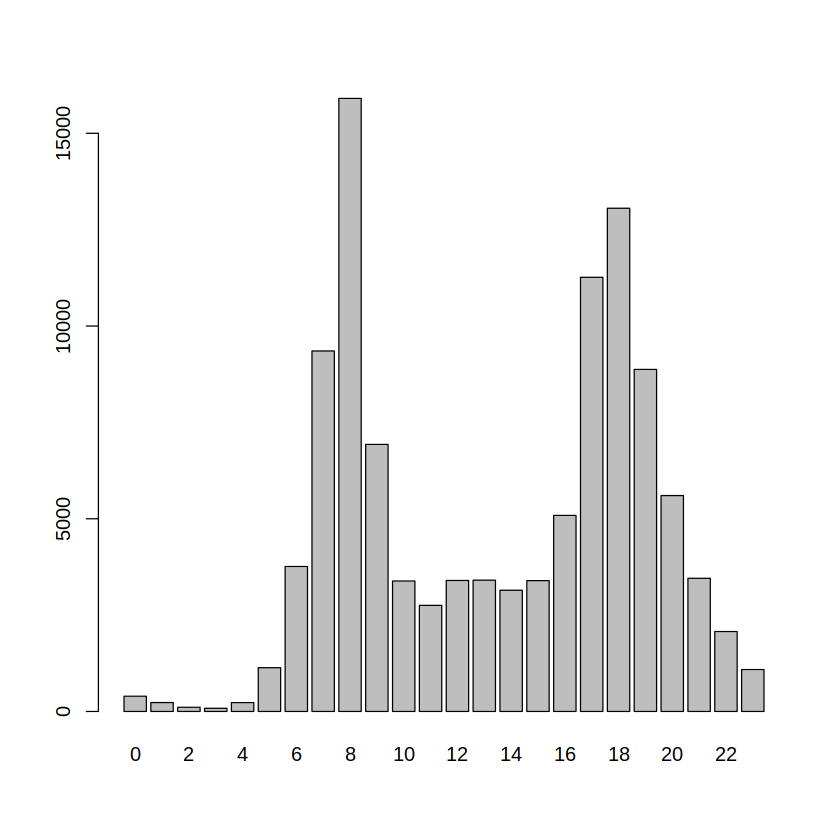

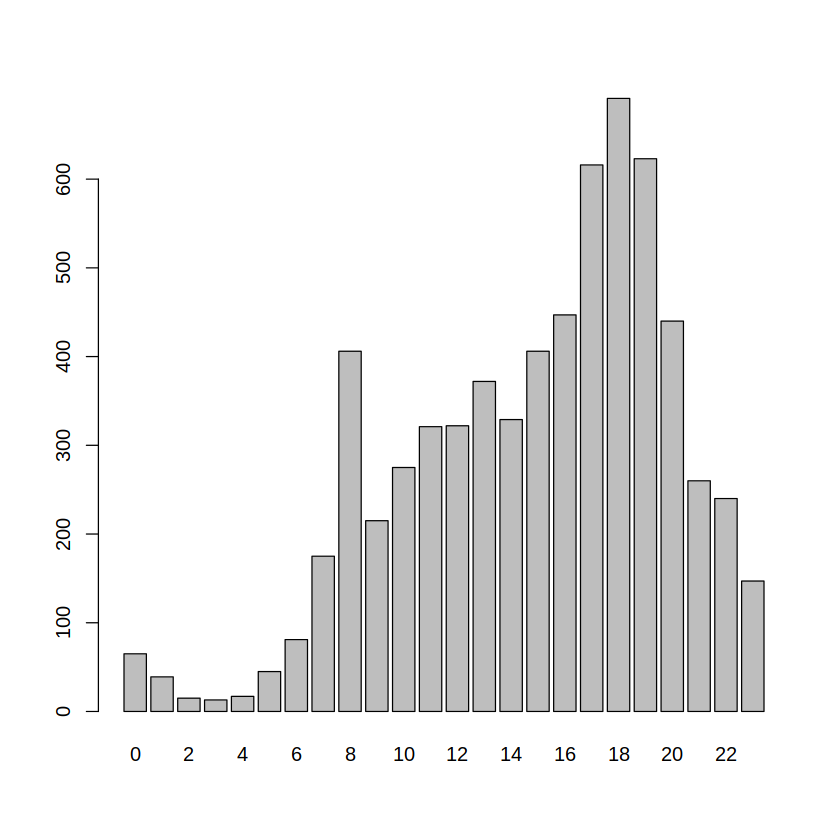

In [12]:
weekdays_subscriber = weekdays[weekdays$usertype == "Subscriber", ]
weekdays_customer = weekdays[weekdays$usertype == "Customer", ]

hour_sub <- table(weekdays_subscriber$hour)
hour_cust <- table(weekdays_customer$hour)

plot_hour_sub <- barplot(hour_sub)
plot_hour_cust <- barplot(hour_cust)

### 7.1\. Using the latitude and longitude information, evaluate the average speed (in km/h) of a user, discarding the trip lasting longer than 1 hour

In [13]:
timestamp <- as.POSIXct(no_outliers$starttime, format = "%Y-%m-%d %H:%M:%S")
timestop <- as.POSIXct(no_outliers$stoptime, format = "%Y-%m-%d %H:%M:%S")

no_outliers$deltaTime <- as.numeric(difftime(timestop, timestamp, units = "secs"))

mask_time <- no_outliers$deltaTime <= (60*60)
less_one_hour <- no_outliers[mask_time,]

initial_point_longitude <- less_one_hour$start.station.longitude
initial_point_latitude <- less_one_hour$start.station.latitude
final_point_longitude <- less_one_hour$end.station.longitude
final_point_latitude <- less_one_hour$end.station.latitude

initial_point <- cbind(initial_point_longitude, initial_point_latitude)
final_point <- cbind(final_point_longitude, final_point_latitude)

less_one_hour$distance <- distHaversine(initial_point, final_point)  # measured in meters

less_one_hour$speed <- (less_one_hour$distance / less_one_hour$deltaTime) *3.6    #so it's km/h

mean_speed <- mean(less_one_hour$speed)

less_one_hour$speed

[1]  8.6406955  6.0395053  7.9495390 11.9951690 11.3595757 11.5033099
    [7]  1.9830993  6.6484937  9.4775303  5.7324118  7.5174834  8.4689532
   [13] 10.3492489  8.9425984 11.1198662 10.1847650  7.0147946  9.3824434
   [19]  7.6247418 11.0538627  9.9226092 15.5313767  1.8154147 10.3614991
   [25]  6.6408391  6.3119050 10.7084841  2.4443773  9.6274599 11.6639193
   [31]  8.6914270  6.2056678  6.1535923  2.5722825  9.4560687 10.4031005
   [37]  9.3627904 15.4348126 10.9416366 11.2732013  0.0000000 14.5462719
   [43] 12.0887957  8.1084008  5.3655590  8.7119890  5.4777814  8.7332935
   [49]  6.8039992  9.4157872  7.4570897  9.9215939  7.2194399 11.6855120
   [55]  3.6521873  8.9676341 15.9629674  9.3063013  9.8728988  7.2538542
   [61]  9.0755776  9.9115672 11.7697340 12.3468830  8.2001940 11.6057864
   [67]  9.1282541 11.5393370  5.9999278  8.8764131 11.7463376 10.6069718
   [73]  8.6575754  3.0695091  7.6432157 12.9852855 13.5660158  7.4132442
   [79]  6.6189680 10.6664701 14.9489711  8.0782580  7.3413899 11.4819274
   [85] 13.4936417  6.5654031  8.3430806  9.2394224 10.1730226  8.8252907
   [91] 10.2547341 11.3940616  8.1477085  7.5339239  9.5313139 10.3533953
   [97]  7.5134231  8.4861133  9.5114632 13.6560385  8.2001940 10.2085926
  [103] 11.5726894  7.8449510  5.8312465  9.2978468  8.6232199  8.6168738
  [109] 10.0604232  8.2709844  8.9013948  9.6415025 12.0467404  7.9495390
  [115]  5.4993869 11.2012959  7.5667784 12.5708154 10.0223656  9.3947860
  [121] 11.7978727 14.2686268  8.4553074 10.9305743 11.0875150  6.8536561
  [127] 13.1865865 11.3871776 10.4878837  8.3430806  8.1115734  7.3274012
  [133]  7.9891596  6.4919511 11.3509272 10.6522128 10.8643698  1.6195477
  [139]  7.4165577 14.0952690  9.2952936 10.8154312 10.2033079  9.0848874
  [145]  6.7069488 12.4960423  7.5236709  8.7977790 10.9098574 13.5014710
  [151]  7.6631430  8.1810790 12.7506487  8.0526737  7.0977870 11.7034880
  [157]  8.3901599  7.9635795  0.0000000  9.1565579 12.2569876 12.0868111
  [163] 10.0140618 10.5402797 10.4065322  7.4675306  1.5860892 10.9774493
  [169] 10.5686262  6.6362270 10.4392423 11.1543523  8.7328792  9.8032550
  [175]  6.6316137 12.9172098 10.7046868  6.4421390 10.9458189  6.7277134
  [181] 10.1222255 11.6554647 11.4947145 11.1675616  9.3513911 10.4517016
  [187]  4.8991345  7.3651096  9.8328118  7.0553617  9.8736645 11.5752713
  [193]  9.3264009  9.2347144  9.7578747 10.5865477  8.1084008 10.0223656
  [199] 10.2762334 11.0164490  8.5304747  6.2581638  8.1193813 10.0819623
  [205]  9.2218422 12.2270207 10.1524234 10.9560931  9.7543132  7.1717868
  [211]  7.6773070  7.9020051  7.7332791 11.5880222  6.0699760  8.0484886
  [217]  6.0869788  9.3279792  7.6512841  7.6774272  4.5762657  7.9395573
  [223]  8.5620454  9.5857715  7.6515895 12.1750360 10.6240760  8.4627753
  [229] 13.0867331  5.0291791  8.0034191 10.2085926 11.2197464  8.9065152
  [235]  8.3881805 10.6845713  7.0576985  6.7529552 10.5023651  9.0860922
  [241]  7.7703098  8.0876939  8.4377884  6.6251568  7.0098433 10.7072758
  [247]  9.9215982  5.1008561 10.3107459  5.9535655  9.2038562  9.0067572
  [253] 10.2083956  7.4815778 12.0241237  0.0000000 14.4256344 13.4385051
  [259] 14.1403018  9.5026636  8.8329607  5.3472300 15.5470618  9.9647013
  [265]  6.9640590 12.3919285 10.6664701  0.0000000 11.5431663 11.7255252
  [271]  8.0483386  8.8575153 15.2099973 11.0593087 11.1543523 10.8205350
  [277]  7.2620022 10.0042739 13.6181984  8.6679629  9.3666009  8.2903970
  [283] 10.2330057 10.3048315  7.9598953  8.1390703  8.8335423  9.2314696
  [289]  4.6532150  9.7059528 10.5308146 10.3270930 12.2609610 10.4248746
  [295]  9.7790992  7.7580462 11.5069571 11.6986051  5.5972481  6.8334950
  [301] 11.0166974  7.9427616  7.1717868 11.2644988  7.7703098  6.0029045
  [307]  6.6972732  6.8108645 10.0211051  6.8508223  7.0811020  9.2519914
  [313] 11.3871776  8.9560493 11.3443146 10.6019723  8.5217703  7.8816874
  [319] 11.1218783 12.6094429  7.5474205 11.2422942  7.5980819 10.8205350
  [325] 

### 7.2\. Plot the average speed as a function of route length for the following group of distances d < 500 m, 500 m < d < 1000 m, 1000 m < d < 2000 m, 2000 m < d < 3000 m, d > 3000 m and discarding trips longer than 1 hour

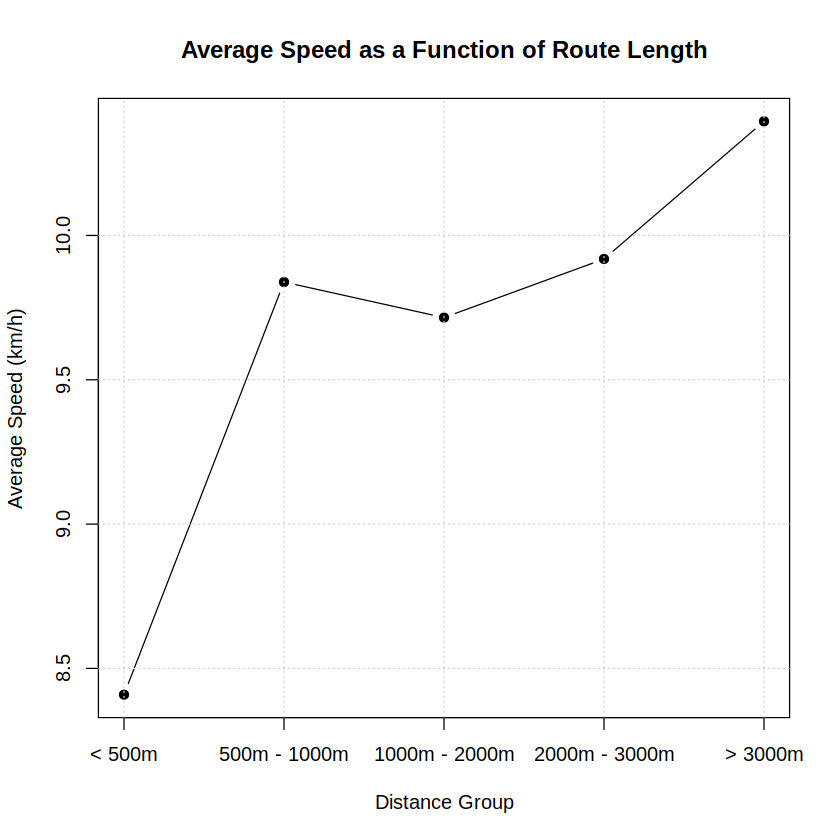

In [14]:
less_one_hour$distance_group <- cut(less_one_hour$distance, breaks = c(0, 500, 1000, 2000, 3000, Inf), labels = c("< 500m", "500m - 1000m", "1000m - 2000m", "2000m - 3000m", "> 3000m"))

average_speed <- aggregate(speed ~ distance_group, data = less_one_hour, FUN = mean, na.rm = TRUE)

custom_labels <- c("< 500m", "500m - 1000m", "1000m - 2000m", "2000m - 3000m", "> 3000m")

plot(x = 1:5, y = average_speed$speed, type = "b", pch = 19,
     xaxt = "n", xlab = "Distance Group", ylab = "Average Speed (km/h)",
     main = "Average Speed as a Function of Route Length")
axis(1, at = 1:5, labels = custom_labels)
grid()

### 7.3\. Repeat the same graph, but show the results obtained separately for weekdays and weekends


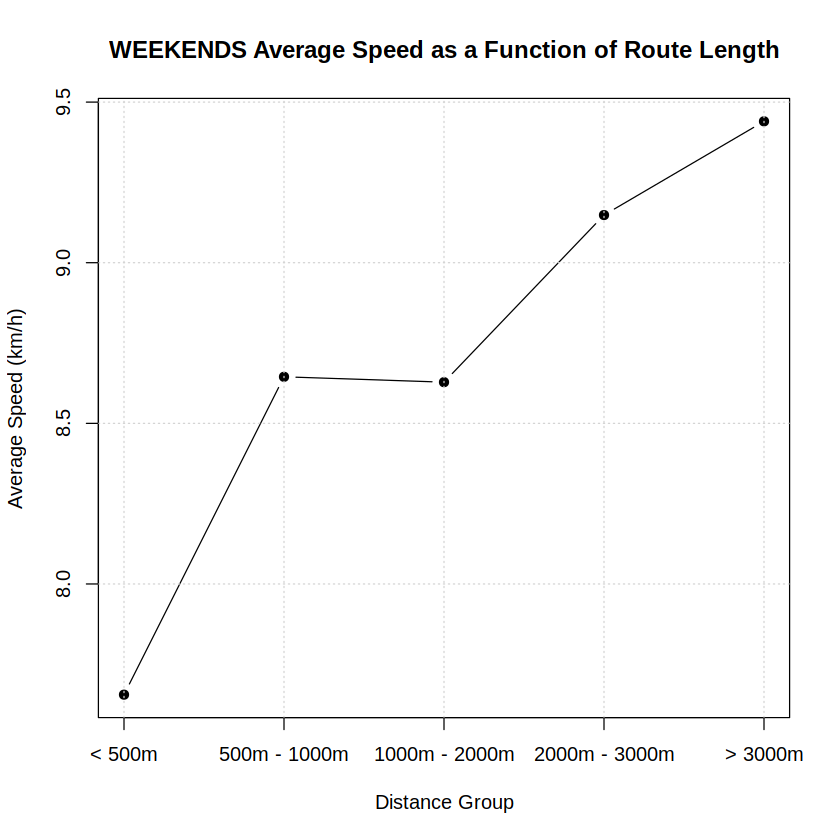

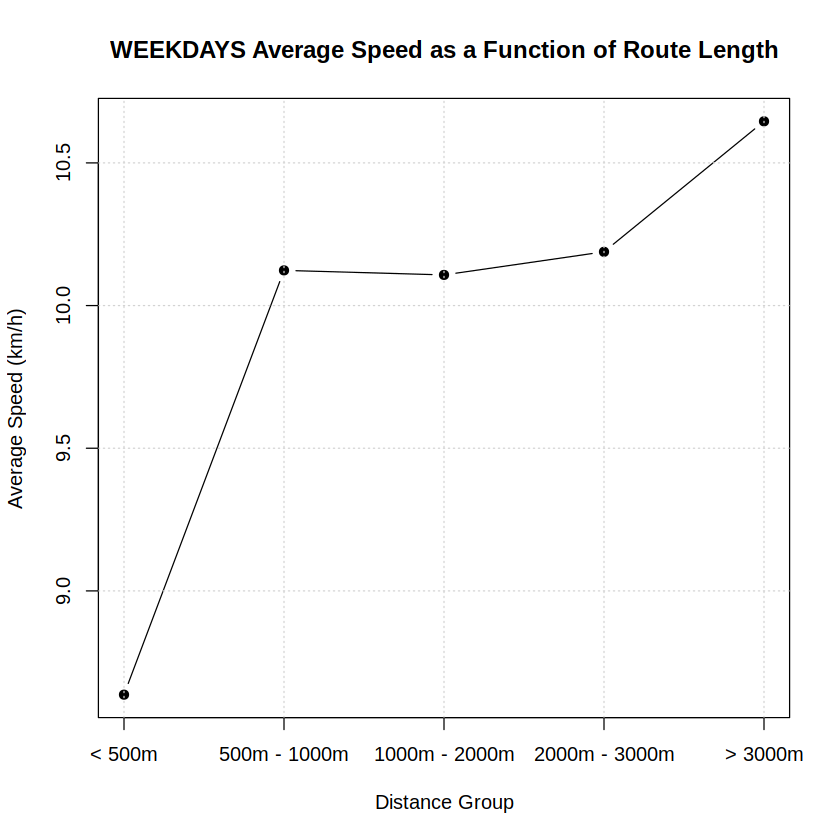

In [15]:
less_one_hour$date <- as.Date(less_one_hour$starttime)
day_of_week <- weekdays(less_one_hour$date)

less_one_hour$day_type <- ifelse(day_of_week %in% c("Saturday", "Sunday"), "weekend", "weekday")

weekends <- less_one_hour[less_one_hour$day_type == "weekend", ]
weekdays <- less_one_hour[less_one_hour$day_type == "weekday", ]

weekends$distance_group <- cut(weekends$distance, breaks = c(0, 500, 1000, 2000, 3000, Inf), labels = c("< 500m", "500m - 1000m", "1000m - 2000m", "2000m - 3000m", "> 3000m"))

average_speed <- aggregate(speed ~ distance_group, data = weekends, FUN = mean, na.rm = TRUE)

custom_labels <- c("< 500m", "500m - 1000m", "1000m - 2000m", "2000m - 3000m", "> 3000m")

plot(x = 1:5, y = average_speed$speed, type = "b", pch = 19,
     xaxt = "n", xlab = "Distance Group", ylab = "Average Speed (km/h)",
     main = "WEEKENDS Average Speed as a Function of Route Length")
axis(1, at = 1:5, labels = custom_labels)
grid()

weekdays$distance_group <- cut(weekdays$distance, breaks = c(0, 500, 1000, 2000, 3000, Inf), labels = c("< 500m", "500m - 1000m", "1000m - 2000m", "2000m - 3000m", "> 3000m"))

average_speed <- aggregate(speed ~ distance_group, data = weekdays, FUN = mean, na.rm = TRUE)

custom_labels <- c("< 500m", "500m - 1000m", "1000m - 2000m", "2000m - 3000m", "> 3000m")

plot(x = 1:5, y = average_speed$speed, type = "b", pch = 19,
     xaxt = "n", xlab = "Distance Group", ylab = "Average Speed (km/h)",
     main = "WEEKDAYS Average Speed as a Function of Route Length")
axis(1, at = 1:5, labels = custom_labels)
grid()

### 8.1\. Find the most common start station and the least popular end station

In [16]:
start_stations <- table(no_outliers$start.station.name)
name_max_start_stations <- names(which.max(start_stations))
num_max_start_stations <- max(start_stations)
cat("The most common start station is", name_max_start_stations, "with", num_max_start_stations, "rides", '\n')


end_stations <- table(no_outliers$end.station.name)
name_min_end_stations <- names(which.min(end_stations))
num_min_end_stations <- min(end_stations)
cat("The least common start station is", name_min_end_stations, "with", num_min_end_stations, "rides", '\n')


The most common start station is Grove St PATH with 17871 rides 
The least common start station is Broadway & W 56 St with 0 rides 


### 8.2\. Show the distribution of start stations


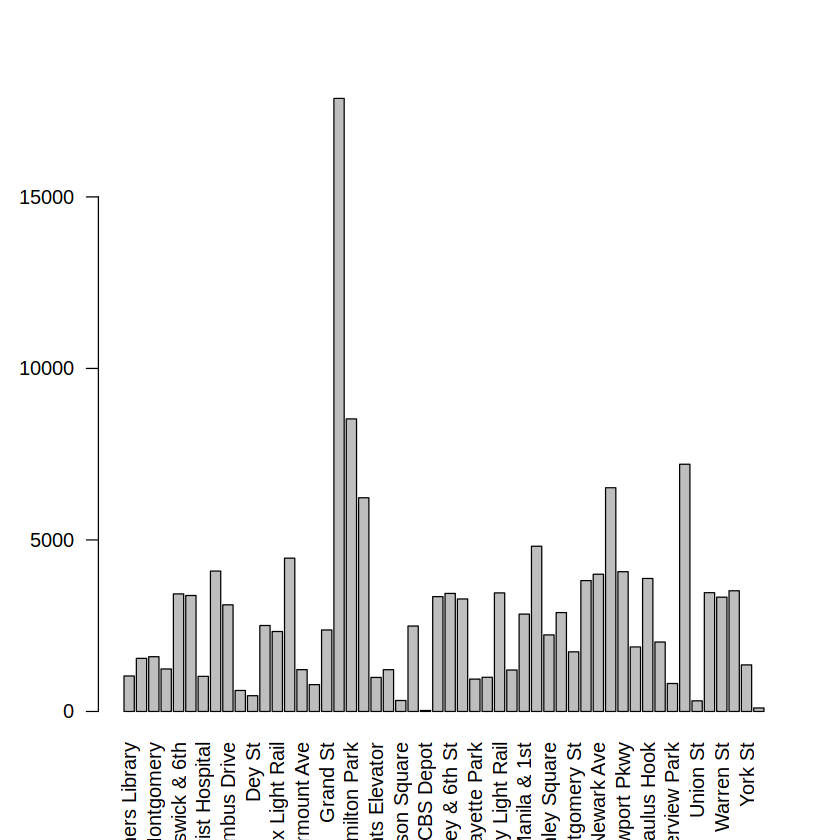

In [17]:
start_stations <- table(no_outliers$start.station.name)

start_stat_distrib <- barplot(start_stations, las = 2)


### 8.3\. Find the three most common routes (start and end station) and the three least popular ones

the three smallest routes are: 



5 Corners Library - Dixon Mills    5 Corners Library - Grand St 
                              1                               1 
  Astor Place - Brunswick & 6th 
                              1 

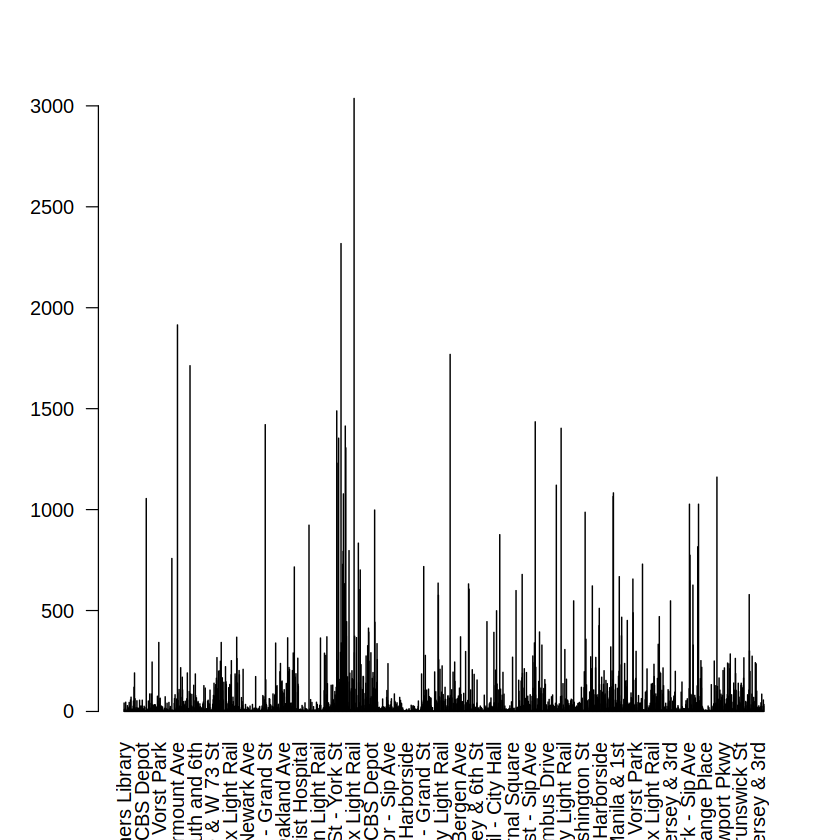

In [18]:
no_outliers$route <- paste(no_outliers$start.station.name, no_outliers$end.station.name, sep = " - ")

route <- table(no_outliers$route)
routes_df <- route[order(route)]

smallest_routes <- head(routes_df, 3)

cat("the three smallest routes are:", '\n')
smallest_routes
route_distrib <- barplot(route, las = 2)